In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize

from scipy.io import loadmat, savemat
import pandas as pd
import scipy.special as SS
import scipy.stats as SSA
import copy
import random
import math
from sklearn.model_selection import ParameterGrid
import os
import numpy.linalg as LA
import gzip

# load pickle module
import pickle

In [2]:
pop = np.loadtxt('pop_new.csv')

In [32]:
# Generate some data from a normal distribution
np.random.seed(0)
data = np.random.normal(0, 1, size=1000)

# Define the negative log-likelihood function
def neg_log_likelihood(params):
    mu, sigma = params
    return -np.sum(norm.logpdf(data, mu, sigma))

# Generate a range of values for mu
mu_values = np.linspace(-1, 1, 10)

# Calculate the likelihood for each mu
likelihoods = []
for mu in mu_values:
    result = neg_log_likelihood([mu, 1])
    likelihoods.append(-result)

# The log-likelihood function and parameter values:
log_likelihood_func = np.array(likelihoods)
param_values = mu_values


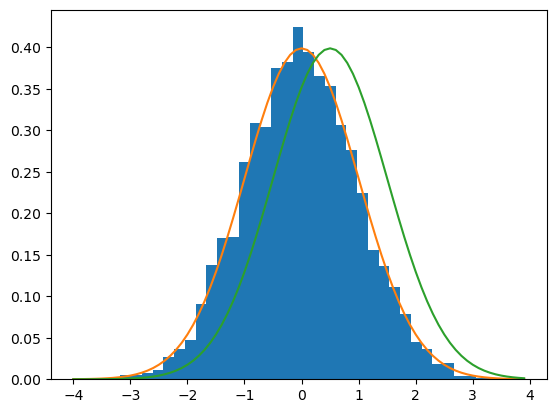

In [27]:
plt.hist(data,density=True,bins=40)
x = np.arange(-4,4,0.1)
plt.plot(x, SSA.norm.pdf(x,loc=0,scale=1))
plt.plot(x, SSA.norm.pdf(x,loc=0.5,scale=1))

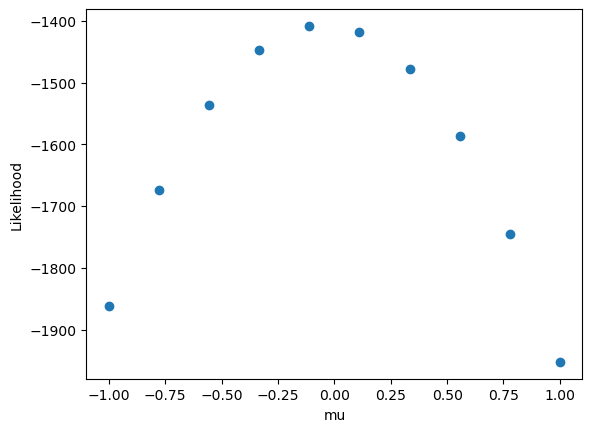

In [33]:
# Plot the likelihood profile
plt.scatter(mu_values, log_likelihood_func)
plt.xlabel('mu')
plt.ylabel('Likelihood')
plt.show()

In [34]:
import numpy as np
from scipy.optimize import minimize

def profile_likelihood_confidence_interval(log_likelihood_func, param_values, max_log_likelihood, confidence_level=0.95):
    # Critical value for chi-square distribution with 1 degree of freedom
    critical_value = {
        0.95: 3.84,
        0.99: 6.63,
        # add more values for other confidence levels if needed
    }[confidence_level]

    # Threshold log-likelihood for confidence interval
    threshold = max_log_likelihood - critical_value / 2

    # Values of parameter for which log-likelihood is above threshold
    above_threshold = param_values[log_likelihood_func >= threshold]

    # Return confidence interval
    return above_threshold[0], above_threshold[-1]

# Assume we have a log-likelihood function and a range of parameter values
# log_likelihood_func = ...
# param_values = ...

# Find maximum log-likelihood
max_log_likelihood = max(log_likelihood_func)

# Compute 95% confidence interval
lower, upper = profile_likelihood_confidence_interval(log_likelihood_func, param_values, max_log_likelihood, confidence_level=0.95)


In [3]:
rs = np.arange(0.01, 1, 0.02)

In [4]:
len(rs)

50

In [13]:
rs

array([0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13, 0.15, 0.17, 0.19, 0.21,
       0.23, 0.25, 0.27, 0.29, 0.31, 0.33, 0.35, 0.37, 0.39, 0.41, 0.43,
       0.45, 0.47, 0.49, 0.51, 0.53, 0.55, 0.57, 0.59, 0.61, 0.63, 0.65,
       0.67, 0.69, 0.71, 0.73, 0.75, 0.77, 0.79, 0.81, 0.83, 0.85, 0.87,
       0.89, 0.91, 0.93, 0.95, 0.97, 0.99])

In [5]:
Inference_mean = np.zeros((50,3142,60))
Inference_std = np.zeros((50,3142,60))
Inference_ensemble_std = np.zeros((50,3142,60))
Observation_i = np.zeros((50,3142,60))
Ensemble_position = {}

In [8]:
R0 = 2.1
save_dir = '../../../../../../Volumes/My Passport/branching/branching_results500/'
for r_idx in range(50):
    print(r_idx)
    r_i = rs[r_idx]
    file_name1 = save_dir + "NewInf_R0-{}_r-{}.npy.gz" .format(np.round(R0,2),np.round(r_i,2))
    f1 = gzip.GzipFile(file_name1, "r")
    NewInf =  np.load(f1)
    
    NewInf[NewInf == 0] = 0.000000000000001
    log_i = np.log(NewInf)
    log_avg_i = np.mean(log_i,axis=0) ### mu
    
    std_ens = np.std(log_i,axis=0) ###sigma
    
    std_new = 9*np.exp(-0.5*log_avg_i) + 0.2
    
    Inference_mean[r_idx,:] = log_avg_i
    Inference_std[r_idx,:] = std_new
    Inference_ensemble_std[r_idx,:] = std_ens
    temp = NewInf[10,:,:]
    temp[temp==0] = 0.000000000000001
    
    obser_ts = np.log(temp) ## take the log
#     obser_ts = temp/pop[:,None]*100000
#     Observation_i[r_idx,:,:] = obser_ts
    Observation_i[r_idx,:,:] = temp
    
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [118]:
rs[25]

0.5099999999999999

In [22]:
rs_selected = [0,1,2,3,4,5,6,25,49] ### select some r values
rs_chosen = rs[rs_selected]

Text(0, 0.5, 'mean_log(daily new infections)')

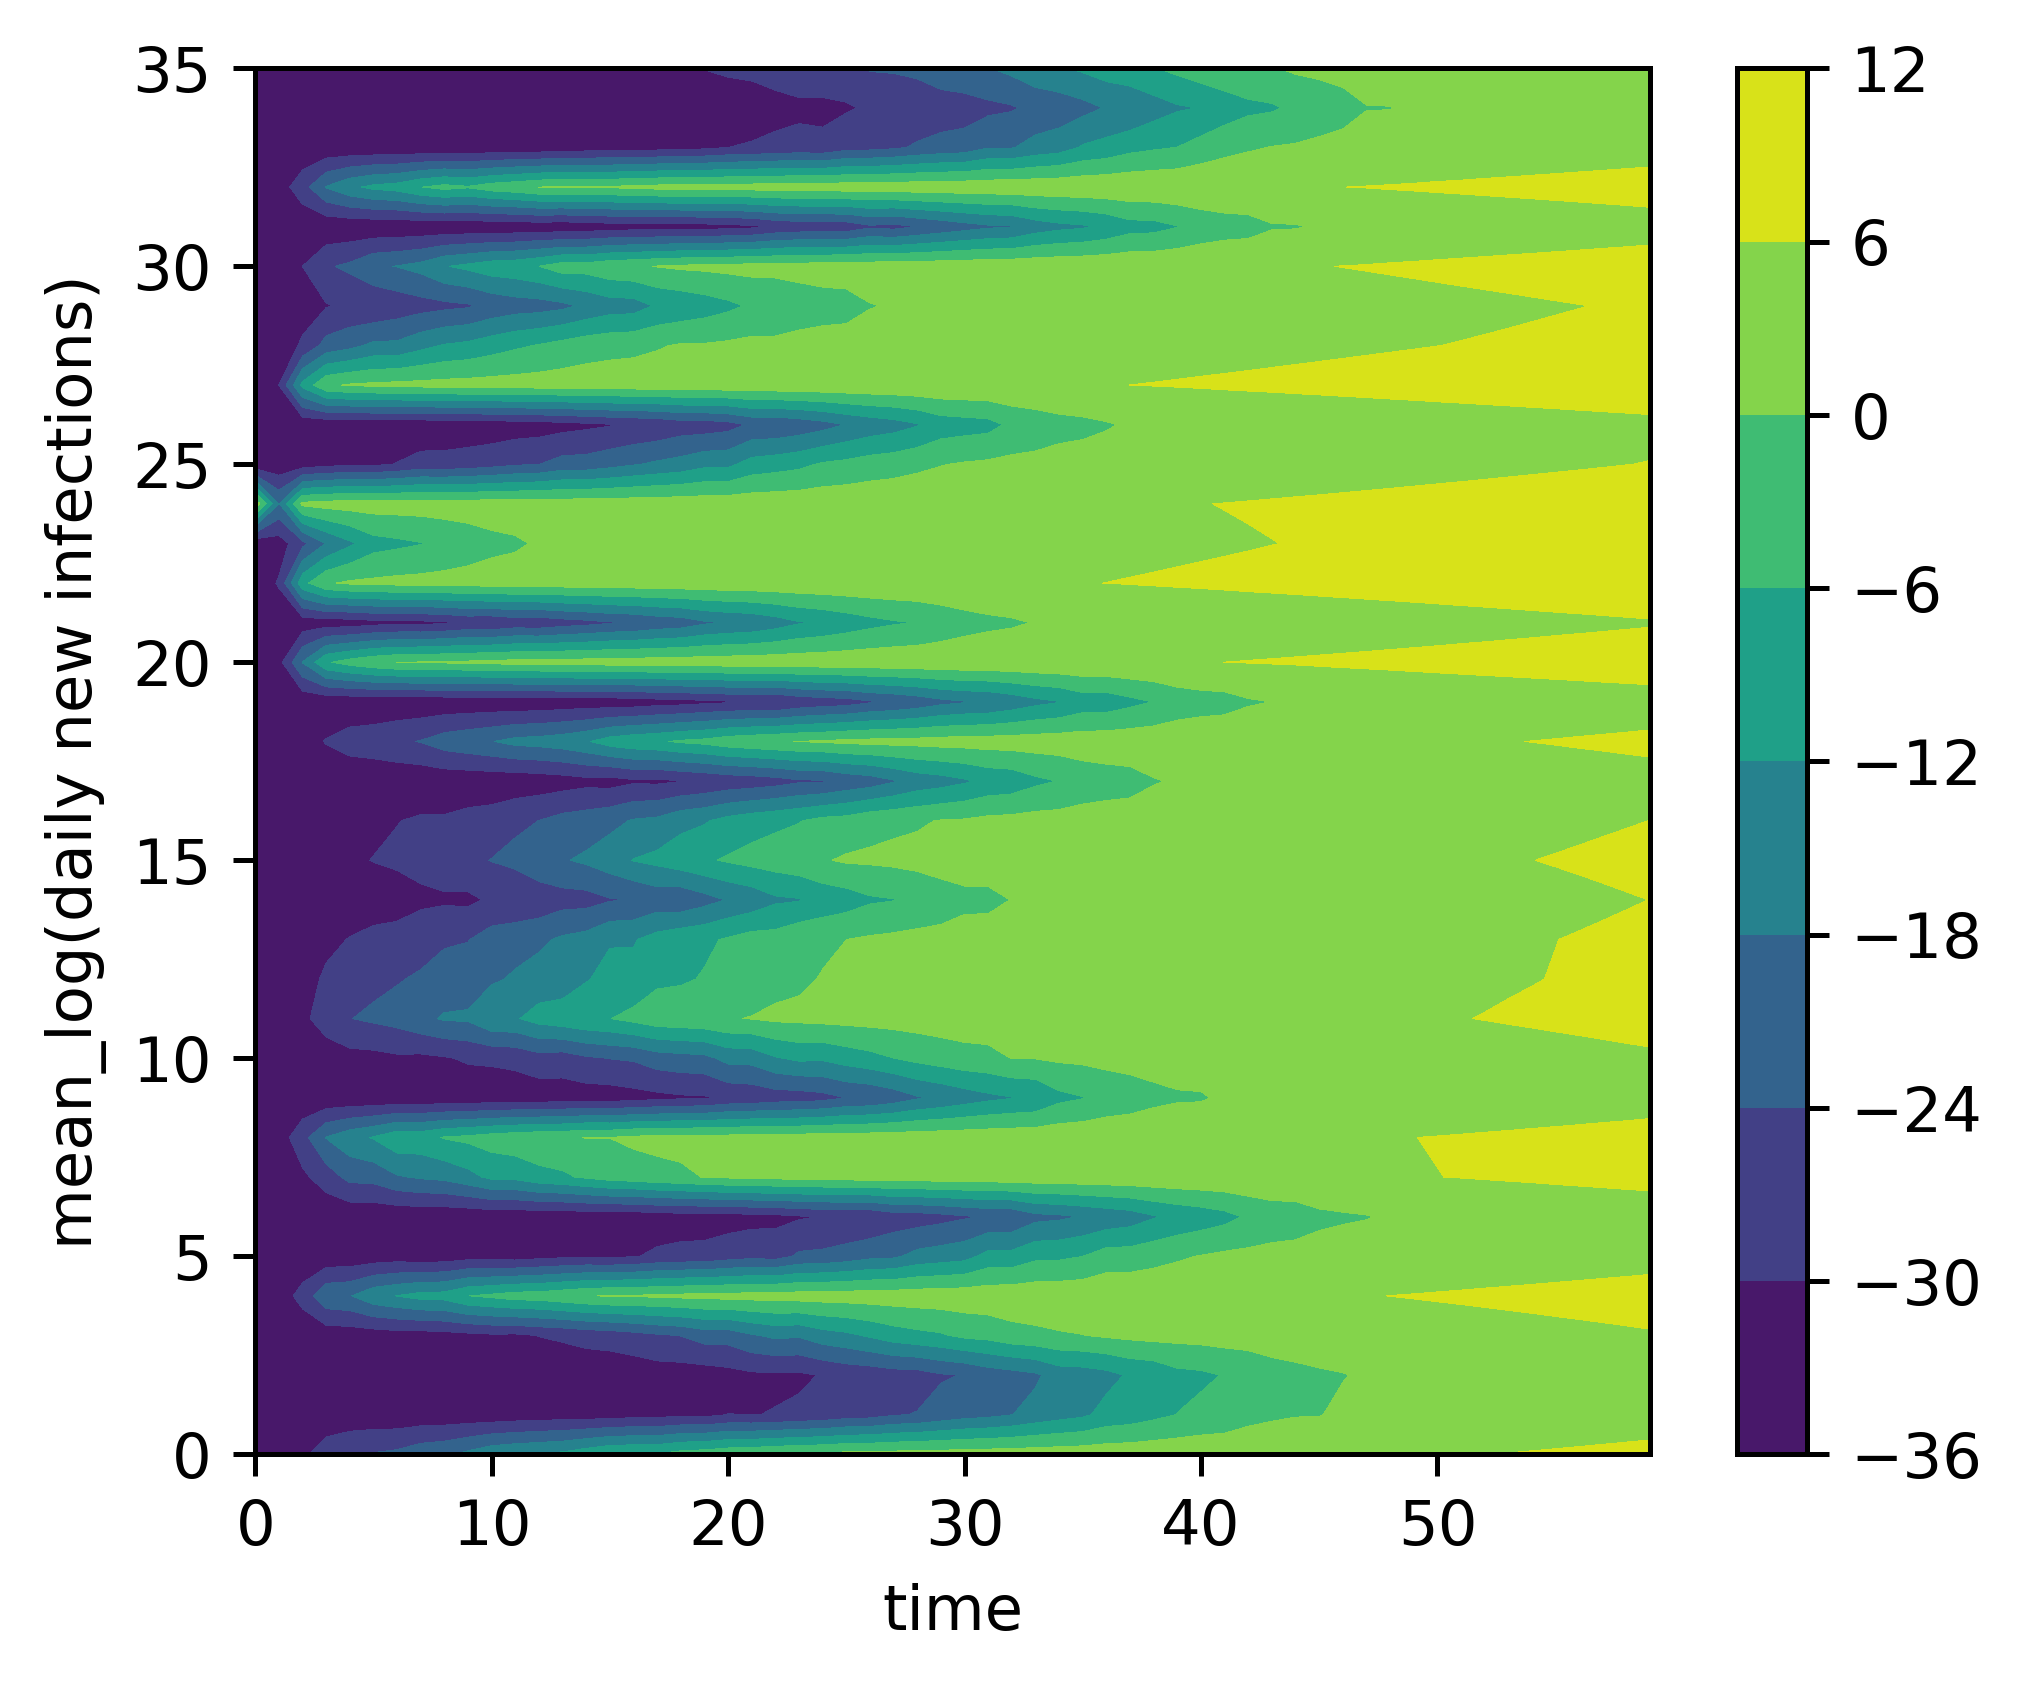

In [119]:
x = np.array(range(60))
y = np.array(range(36))

X, Y = np.meshgrid(x, y)

Z = Inference_mean[25][ensemble_mean_p]
# Z = g_i[:,30:]

fig1, ax2 = plt.subplots(figsize=(5, 4), dpi=450)
contour = ax2.contourf(X, Y, Z, cmap=plt.cm.viridis) #vmax=36

cbh = plt.colorbar(contour, orientation='vertical', pad=0.05)
plt.xlabel('time')
plt.ylabel('mean_log(daily new infections)')

Text(0, 0.5, 'observed_log(daily new infections)')

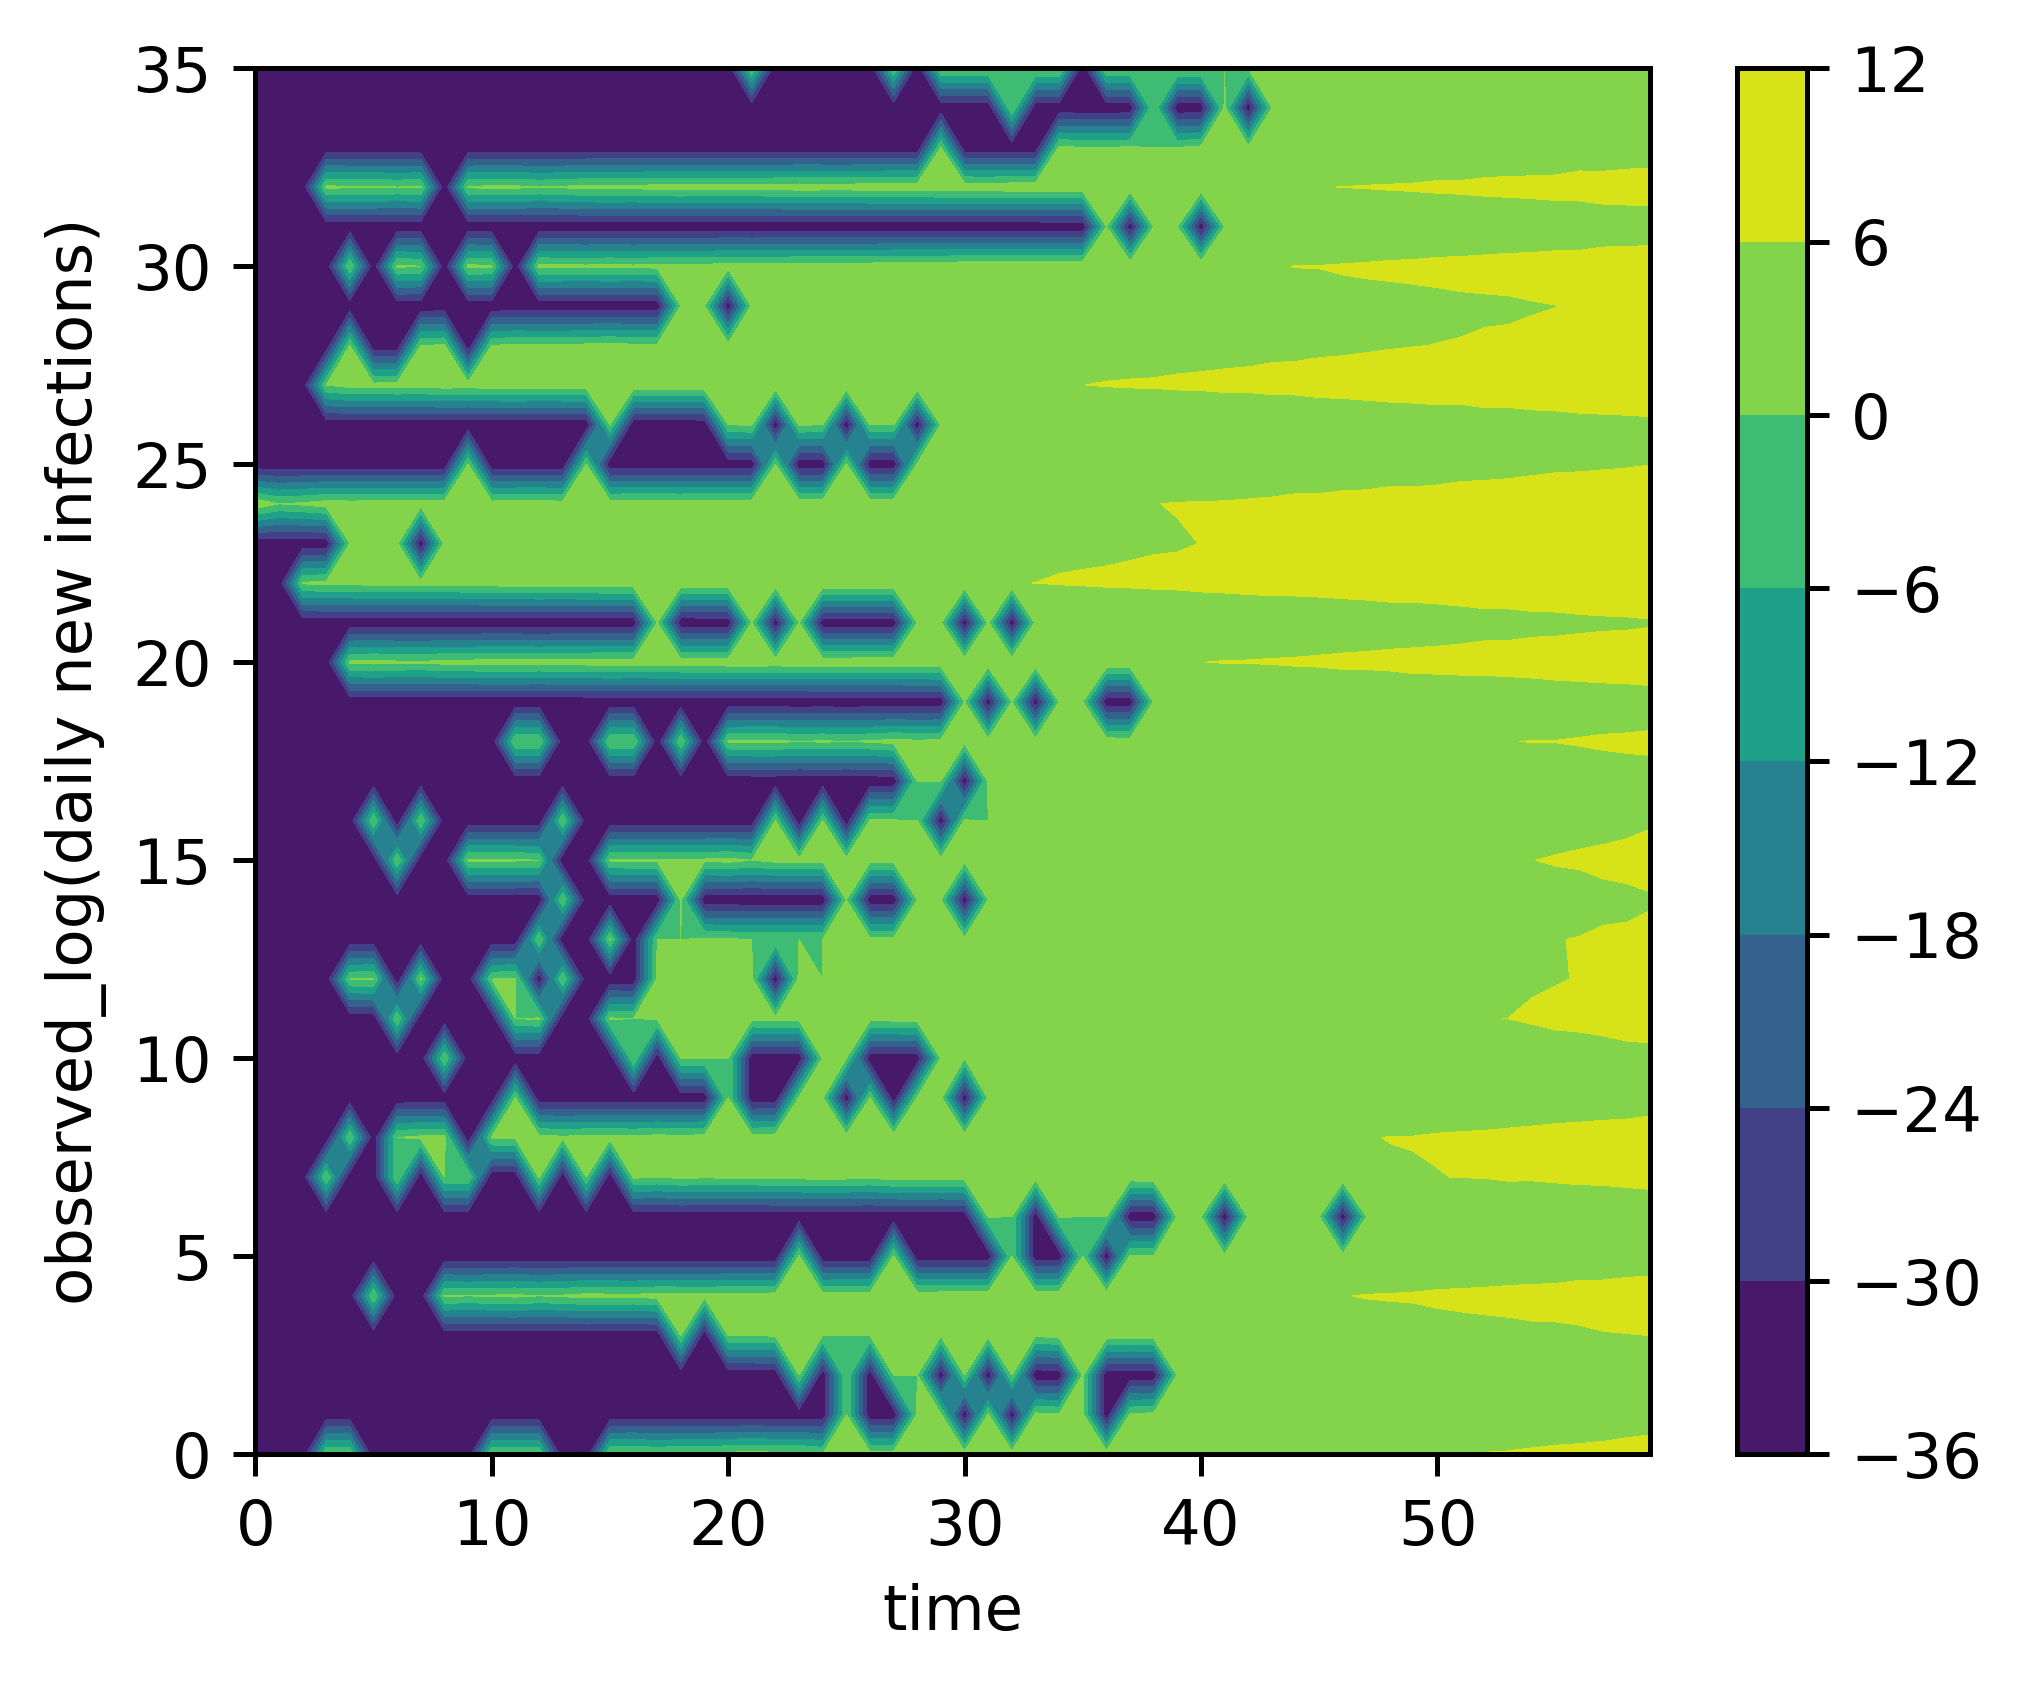

In [114]:
x = np.array(range(60))
y = np.array(range(36))

X, Y = np.meshgrid(x, y)

Z = np.log(observed_ts[ensemble_mean_p])
# Z = g_i[:,30:]

fig1, ax2 = plt.subplots(figsize=(5, 4), dpi=450)
contour = ax2.contourf(X, Y, Z, cmap=plt.cm.viridis) #vmax=36

cbh = plt.colorbar(contour, orientation='vertical', pad=0.05)
plt.xlabel('time')
plt.ylabel('observed_log(daily new infections)')

In [105]:
th = 10
R_loglikelihood_sum = np.zeros((9,50)) ### different ranges
R_loglikelihood_maxtrix = dict()
for i in range(1,9):
    r_s_idx = rs_selected[i]
    r_s = rs[r_s_idx]
    
    observed_ts = Observation_i[r_s_idx]
    
    for r_idx in range(1,50):
        position = np.where(log_avg_i[:,59]>np.log(th))
        mle_matrix = observed_ts[position]
#         print(r_idx)
        mean_r = Inference_mean[r_idx][position]
#         std_r = Inference_std[r_idx][county_position]
        std_en = Inference_ensemble_std[r_idx][position]
    #     std_r_ma = mean_county_r*0.1+1
        M_likelihood = SSA.lognorm.pdf(mle_matrix, s=std_en, loc=0, scale=np.exp(mean_r))
        M_likelihood[M_likelihood==0]=0.0000001
#         M_likelihood = np.clip(M_likelihood, 1e-10, None)
#         for t in range(60):
        R_loglikelihood_maxtrix[(i,r_idx)] = np.log(M_likelihood)
        R_loglikelihood_sum[i,r_idx] = np.sum(np.log(M_likelihood))

In [113]:
mle_matrix.shape

(43, 60)

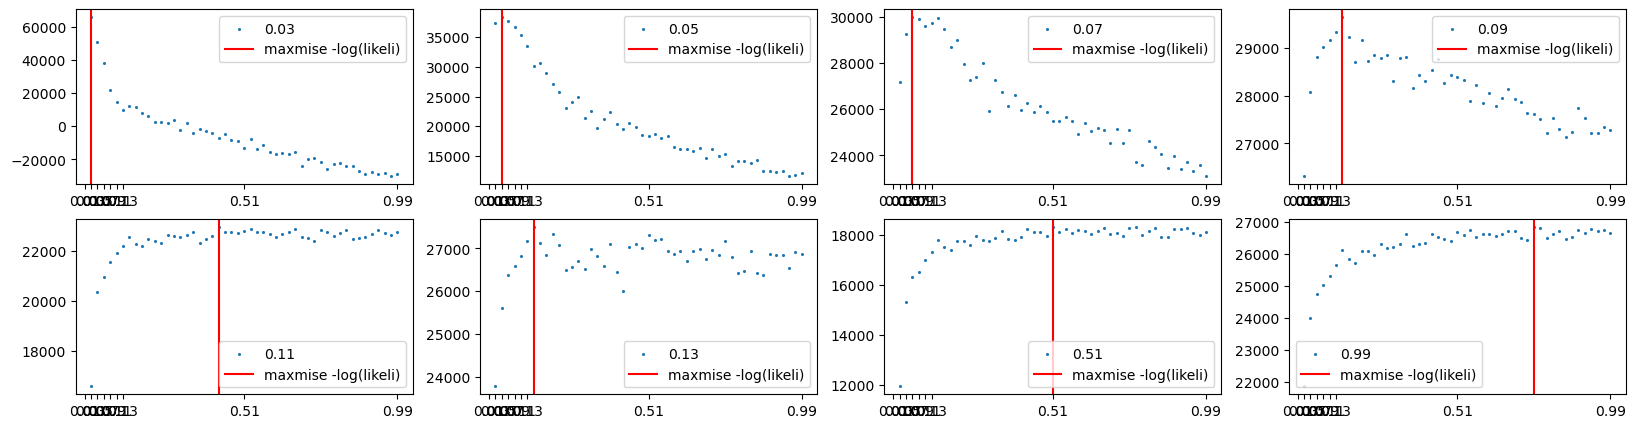

In [120]:
fig, axs = plt.subplots(2,4,figsize=(20,5))
for i in range(1,9):
    row = int((i-0.1)/4)
    col = int((i-0.1)%4)
    ax = axs[row,col]
    pos_le = -R_loglikelihood_sum[i,1:]
    mle = np.where( pos_le == np.min(pos_le))[0][0]
#     print(mle)
    r_s_idx = rs_selected[i]
    r_s = rs[r_s_idx]
    
    ax.scatter(range(1,50), R_loglikelihood_sum[i,1:],label = np.round(r_s,2),s=1.5)
    ax.axvline(mle+1, color='red',label='maxmise -log(likeli)')
#     ax.set_yscale('log')

    ax.set_xticks(rs_selected)
    ax.set_xticklabels(np.round(rs_chosen,2))
#     ax.set_xscale('log')
    
    
    ax.legend()
    
plt.show()